First step is to import the dataset using pandas library

In [1]:
import numpy as np
import pandas as pd
import re
import json
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../csv/data_extraction.csv')

Then print the shape of the data frame like a tuple of (rows, columns) 

In [3]:
data.shape

(6864, 17)

Take a look at the data types of each column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_name                  6864 non-null   object 
 1   car_year                  6864 non-null   int64  
 2   car_price                 6864 non-null   int64  
 3   car_color                 6864 non-null   object 
 4   car_fuel                  6864 non-null   object 
 5   car_origin                6864 non-null   object 
 6   car_license               6864 non-null   object 
 7   car_gear                  6864 non-null   object 
 8   car_glass                 6864 non-null   object 
 9   car_motor_power           6864 non-null   int64  
 10  car_speedometer           4923 non-null   object 
 11  car_number_of_passengers  6087 non-null   object 
 12  car_driver_system_type    1431 non-null   object 
 13  car_payment_method        6864 non-null   object 
 14  car_prev

Check if there is any missing value in the data 

In [5]:
data.isna().any()

car_name                    False
car_year                    False
car_price                   False
car_color                   False
car_fuel                    False
car_origin                  False
car_license                 False
car_gear                    False
car_glass                   False
car_motor_power             False
car_speedometer              True
car_number_of_passengers     True
car_driver_system_type       True
car_payment_method          False
car_previous_owners          True
car_sunroof                  True
car_magnesium_rims           True
dtype: bool

Compute the number of missing values in each column 

In [6]:
data.isna().sum()

car_name                       0
car_year                       0
car_price                      0
car_color                      0
car_fuel                       0
car_origin                     0
car_license                    0
car_gear                       0
car_glass                      0
car_motor_power                0
car_speedometer             1941
car_number_of_passengers     777
car_driver_system_type      5433
car_payment_method             0
car_previous_owners         1650
car_sunroof                 5049
car_magnesium_rims          1845
dtype: int64

Add number of missing values to df

In [7]:
missing_stats=data.isna().sum().reset_index().rename(columns={"index": "column_name", 0: "missing_count"})
missing_stats

,column_name,missing_count
0,car_name,0
1,car_year,0
2,car_price,0
3,car_color,0
4,car_fuel,0
5,car_origin,0
6,car_license,0
7,car_gear,0
8,car_glass,0
9,car_motor_power,0


Get columns with missing values

In [8]:
colums_with_na=(missing_stats.loc[missing_stats["missing_count"]>0])['column_name'].values
colums_with_na

array(['car_speedometer', 'car_number_of_passengers',
       'car_driver_system_type', 'car_previous_owners', 'car_sunroof',
       'car_magnesium_rims'], dtype=object)

Compute percentage of nan in every column

In [9]:
percent_missing=data.isna().sum()/data.shape[0]*100
percent_missing

car_name                     0.000000
car_year                     0.000000
car_price                    0.000000
car_color                    0.000000
car_fuel                     0.000000
car_origin                   0.000000
car_license                  0.000000
car_gear                     0.000000
car_glass                    0.000000
car_motor_power              0.000000
car_speedometer             28.277972
car_number_of_passengers    11.319930
car_driver_system_type      79.152098
car_payment_method           0.000000
car_previous_owners         24.038462
car_sunroof                 73.557692
car_magnesium_rims          26.879371
dtype: float64

Drop columns with more than 70% missing values

We don't drop car sunroof column because the NaN value in this column is 0

In [10]:
data.drop(columns='car_driver_system_type', inplace=True)

Now we will see how many types in each column we have and see if we can reduce them and make them more readable and clean the data by see if there are any constants and noise in the data

In [11]:
# pd.set_option('display.max_rows', None) to show all rows in the dataframe
# pd.set_option('display.max_columns', None) to show all columns in the dataframe
def unique_values_count(dataframe, column_name):
    unique_values = dataframe[column_name].unique()
    counts = Counter(dataframe[column_name])
    return pd.DataFrame(counts.items(), columns=[column_name, 'count'])

In [12]:
car_name=unique_values_count(data, 'car_name')
car_name

,car_name,count
0,كيا اوبتيما,43
1,كيا سورينتو,106
2,هونداي افانتي,51
3,فيات 127,20
4,بيجو 208,14
...,...,...
614,دراجة نارية sym xpro,1
615,مرسيدس 6 ابواب,1
616,ميتسوبيشي سوبر لانسر,1
617,دراجة نارية كواساكي,1


In [13]:
car_year=unique_values_count(data, 'car_year')
car_year

,car_year,count
0,2014,575
1,2007,342
2,2006,308
3,1982,46
4,2015,534
5,2003,116
6,2005,175
7,2012,344
8,2016,525
9,1998,101


In [14]:
car_price=unique_values_count(data, 'car_price')
car_price

,car_price,count
0,100000,75
1,60000,177
2,43500,11
3,5500,8
4,54000,39
...,...,...
468,106999,1
469,189000,1
470,139500,1
471,59900,1


In [15]:

car_fuel=unique_values_count(data, 'car_fuel')
car_fuel

,car_fuel,count
0,بنزين,3970
1,ديزل,2870
2,هايبرد,23
3,كهرباء,1


In [16]:
car_original=unique_values_count(data, 'car_origin')
car_original

,car_origin,count
0,خصوصي,5833
1,عمومي,580
2,تأجير,128
3,تجاري,189
4,تدريب سياقة,38
5,حكومي,96


In [17]:
car_license=unique_values_count(data, 'car_license')
car_license

,car_license,count
0,فلسطينية,6789
1,نمرة صفراء,75


In [18]:
car_gear=unique_values_count(data, 'car_gear')
car_gear

,car_gear,count
0,اوتوماتيك,3623
1,نصف اوتوماتيك,180
2,عادي,3061


In [19]:
car_glas=unique_values_count(data, 'car_glass')
car_glas

,car_glass,count
0,الكتروني,6338
1,يدوي,526


In [20]:
car_motor_power=unique_values_count(data, 'car_motor_power')
car_motor_power

,car_motor_power,count
0,2000,1268
1,2500,259
2,1600,1885
3,906,1
4,1200,334
...,...,...
139,150,1
140,2005,1
141,6400,1
142,1018,1


In [21]:
car_speedometer=unique_values_count(data, 'car_speedometer')
car_speedometer

,car_speedometer,count
0,75000,69
1,130000,52
2,NaN,1941
3,شغال,19
4,38000,8
...,...,...
1220,26,1
1221,38500,1
1222,222222,1
1223,177,1


In [22]:
car_number_of_passengers=unique_values_count(data, 'car_number_of_passengers')
car_number_of_passengers

,car_number_of_passengers,count
0,4+1,4855
1,7+1,167
2,NaN,777
3,5+1,92
4,٤+١,33
5,8,1
6,6+1,613
7,4+١,14
8,٧,3
9,"7,+ 1",1


In [23]:
car_payment_method=unique_values_count(data, 'car_payment_method')
car_payment_method

,car_payment_method,count
0,نقدا فقط,4323
1,إمكانية التقسيط,2541


In [24]:
car_previous_owners=unique_values_count(data, 'car_previous_owners')
car_previous_owners

,car_previous_owners,count
0,يد اولى,596
1,2,503
2,NaN,1650
3,00,28
4,0,355
...,...,...
304,يد عاشرة,1
305,بد اولى مستورد,1
306,ثالثى,1
307,0 استيراد,1


After we take look at the data we can see that we have continuous and noisy data, and we can reduce some types of data 

This function is for deleting `outliers` from specific column

In [25]:

def delete_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]
    return dataframe


This function takes in the DataFrame (data) and the name of the column to be `encoded` (column_name). It then performs both label encoding and one-hot encoding, dropping the original categorical column and returning the updated DataFrame.

In [26]:
def encode_and_one_hot_encode(dataframe, column_name):
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(dataframe[[column_name]])
    categories = encoder.categories_[0]
    for i, category in enumerate(categories):
        dataframe.loc[:, f"{column_name}_{category}"] = encoded[:, i].astype(int)
    dataframe.drop(columns=[column_name], inplace=True)
    return dataframe.copy()

Now lets take column by column and clean them

Change the type of `car_year` to int

In [27]:
data['car_year'] = data['car_year'].astype(int)

Delete outliers in `car price` column by using delete_outliers function 

In [28]:
data['car_price'].describe()

count      6864.000000
mean      66933.643211
std       57022.973482
min        1111.000000
25%       36000.000000
50%       55000.000000
75%       83000.000000
max      999999.000000
Name: car_price, dtype: float64

In [29]:
data=delete_outliers(data,'car_price')

The `color` of the cars is not effect in my model predict do we need to drop it

In [30]:
data.drop(columns=['car_color'],inplace=True)

For `car fuel` column nothing to clean, so i encoded it to 0 and 1

In [31]:
data = encode_and_one_hot_encode(data, 'car_fuel')


For `car origin` column nothing to clean, so i encoded it to 0 and 1

In [32]:
data = encode_and_one_hot_encode(data, 'car_origin')

In the `car gear` we have 3 types of gear [اوتوماتيك,عادي,نصف اوتوماتيك] so we can reduce it by make the value "نصف اوتوماتيك "to "اوتوماتيك" becuse it dosnet effect in the price of the cars, then i encoded to 0 and 1

In [33]:
data.loc[data['car_gear'] == 'نصف اوتوماتيك', 'car_gear'] = 'اوتوماتيك'
# data = encode_and_one_hot_encode(data, 'car_gear')
data.loc[data['car_gear'] == 'اوتوماتيك', 'car_gear'] = 1
data.loc[data['car_gear'] == 'عادي', 'car_gear'] = 0

For `car license` column nothing to clean, so i encoded it to 0 and 1

In [34]:
# data = encode_and_one_hot_encode(data, 'car_license')
data.loc[data['car_license'] == 'فلسطينية', 'car_license'] = 1
data.loc[data['car_license'] == 'نمرة صفراء', 'car_license'] = 0

For `car glass` column nothing to clean, so i encoded it to 0 and 1

In [35]:
# data = encode_and_one_hot_encode(data, 'car_glass')
data.loc[data['car_glass'] == 'الكتروني', 'car_glass'] = 1
data.loc[data['car_glass'] == 'يدوي', 'car_glass'] = 0

 I take every car name and find the most common value of `car_motor_power` in that car name and replace the unique values with the most common value in that car name then delete the outliers from car_motor_power column 

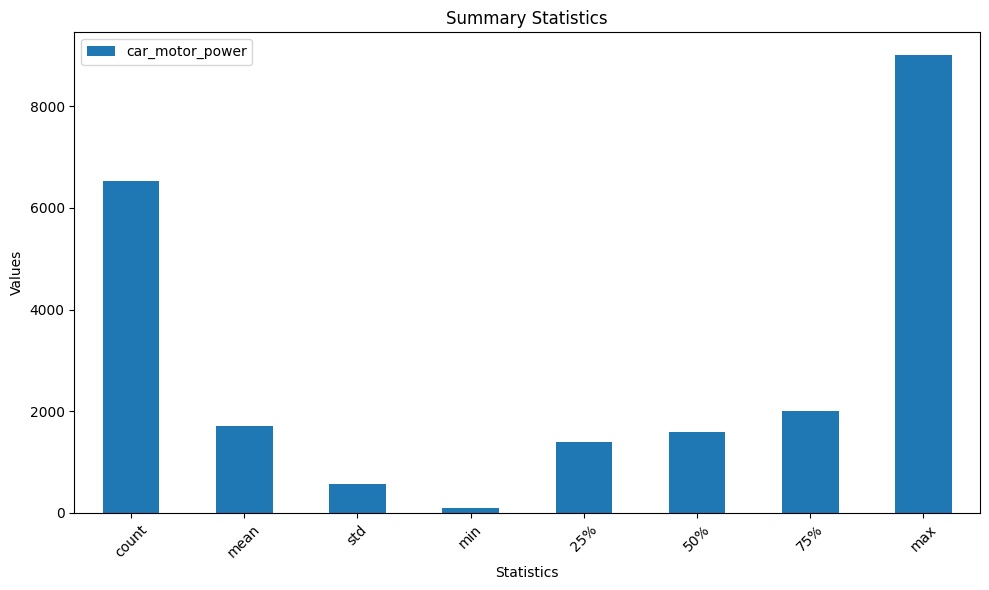

In [36]:
summary = data['car_motor_power'].describe()

# Transpose the summary statistics for better visualization
summary = summary.T

# Plotting the boxplot
fig, ax = plt.subplots(figsize=(10, 6))
summary.plot(kind='bar', ax=ax)
plt.title('Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [37]:

def clean_car_motor_power(dataframe):
    for car_name in dataframe['car_name'].unique():
        car_data = dataframe[dataframe['car_name'] == car_name]['car_motor_power']
        counts = Counter(car_data)
        
        unique_values = [value for value, count in counts.items() if count == 1]
        
        most_common = counts.most_common(1)
        most_common_value = most_common[0][0] if most_common else None
        
        for unique_value in unique_values:
            dataframe.loc[(dataframe['car_name'] == car_name) & (dataframe['car_motor_power'] == unique_value), 'car_motor_power'] = most_common_value

    return dataframe


cleaned_car_motor_power = clean_car_motor_power(data)
data['car_motor_power'] = cleaned_car_motor_power['car_motor_power']

data=delete_outliers(data,'car_motor_power')

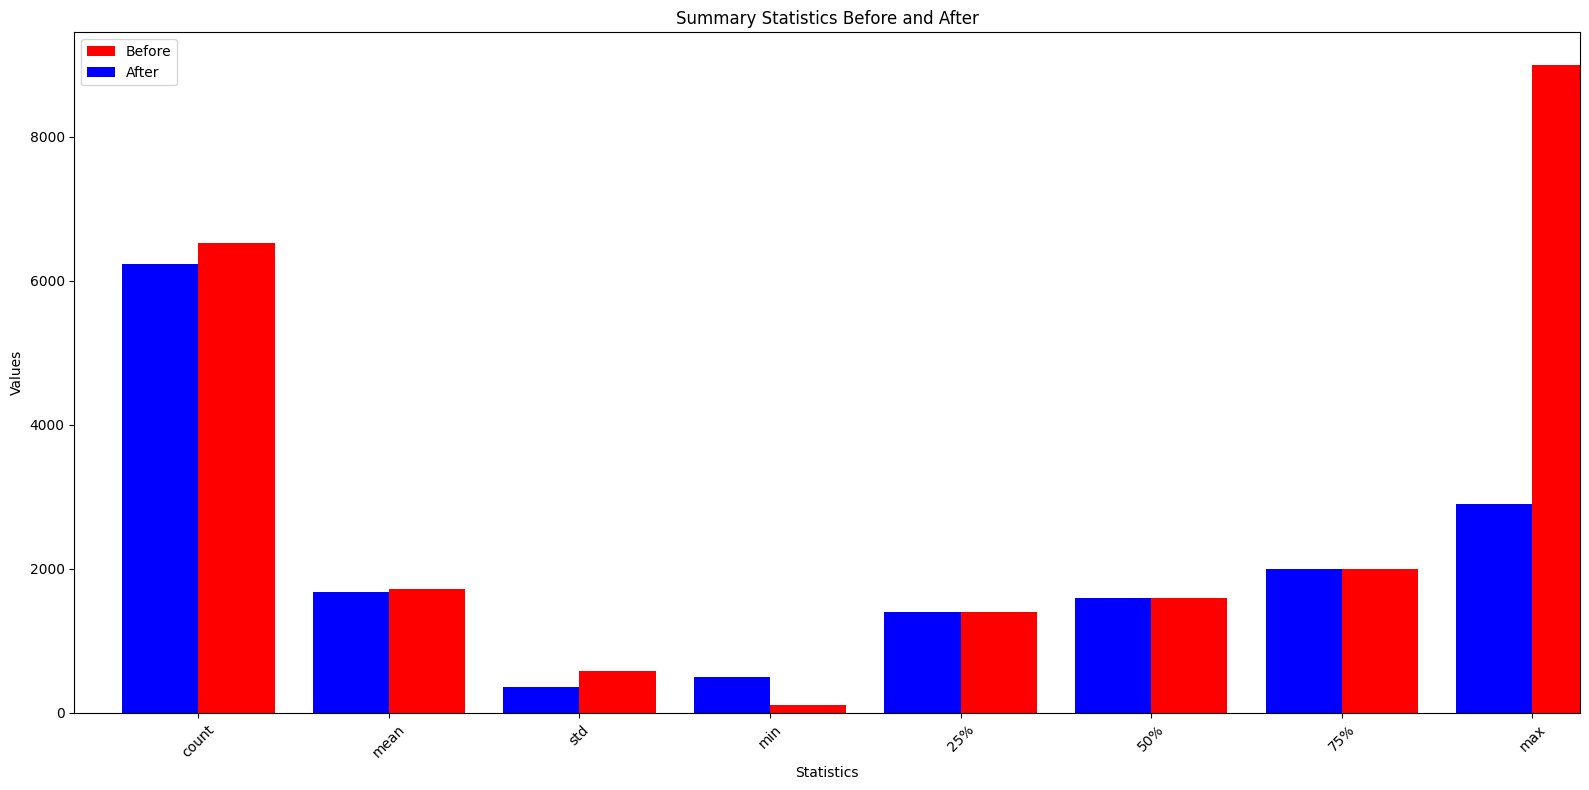

In [38]:
summary_before = summary
summary_after = data['car_motor_power'].describe().T

# Plotting side-by-side bar charts for comparison
fig, ax = plt.subplots(figsize=(16, 8))
summary_before.plot(kind='bar', color='red', position=0, width=0.4, label='Before', ax=ax)
summary_after.plot(kind='bar', color='blue', position=1, width=0.4, label='After', ax=ax)
plt.title('Summary Statistics Before and After')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# car speedometer
I took the mean of the speedometer values for each car and filled the missing values with it, then I took the car that has only one occurrence and drop it.

Then delete the outliers.

I took the car that has a model year below 2000 and its speedometer below 10000 and multiply it by 1000, then I took the car that has a model year between 2000 and 2020 and its speedometer below 10000 and multiply it by 300, then I took the car that has a model year between 2020 and 2023 and its speedometer below 1000 multiply it by 70, then I dropped each car that has a speedometer less than 1000.

This is the most logical thing I could do with this feature.

In [39]:
pattern = r'\D+' 
data['car_speedometer'].replace(to_replace=pattern, value='', regex=True,inplace=True)
data['car_speedometer'].replace(to_replace='', value=np.nan, regex=True,inplace=True)


C:\Users\SS\AppData\Local\Temp\ipykernel_4156\2491648481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_speedometer'].replace(to_replace=pattern, value='', regex=True,inplace=True)
C:\Users\SS\AppData\Local\Temp\ipykernel_4156\2491648481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_speedometer'].replace(to_replace='', value=np.nan, regex=True,inplace=True)


In [40]:
data['car_speedometer'] = pd.to_numeric(data['car_speedometer'], errors='coerce').fillna(0)


C:\Users\SS\AppData\Local\Temp\ipykernel_4156\1592153077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_speedometer'] = pd.to_numeric(data['car_speedometer'], errors='coerce').fillna(0)


In [41]:

data.loc[data['car_speedometer'] == 0.0, 'car_speedometer'] = None

mean_speed_per_car = data.groupby('car_name')['car_speedometer'].mean()

for car_name, mean_speed in mean_speed_per_car.items():
    data.loc[(data['car_speedometer'].isnull()) & (data['car_name'] == car_name), 'car_speedometer'] = mean_speed

single_occurrence_cars = data['car_name'].value_counts()[data['car_name'].value_counts() == 1].index
data = data.dropna(subset=['car_speedometer'], how='all').loc[~(data['car_name'].isin(single_occurrence_cars) & data['car_speedometer'].isnull())]

data['car_speedometer'].fillna(0.0, inplace=True)

data=delete_outliers(data,'car_speedometer')

data.loc[(data['car_year'] <= 2000) & (data['car_speedometer'] < 10000), 'car_speedometer'] *= 1000
data.loc[((data['car_year'] > 2000) & (data['car_year'] <= 2020)) & (data['car_speedometer'] < 1000), 'car_speedometer'] *= 150
data.loc[((data['car_year'] > 2020) & (data['car_year'] <= 2023)) & (data['car_speedometer'] < 1000), 'car_speedometer'] *= 70

data_to_drop = ((data['car_year'] < 2022) & (data['car_speedometer'] <= 1000) & (data['car_speedometer'] >= 0))

data.drop(data[data_to_drop].index, inplace=True)
data['car_speedometer'] = data['car_speedometer'].astype(int)



For `number of passengers` i remove evrything that is not a number, and fill the NaN values with the 0.

Then change the type to int to replace the arabic number to english.

Take every value that is 2 digits and sum them together to get the number of passengers.

Fill the NaN values with the mode based on the car name.

In [42]:
pattern = r'\D+' 
data['car_number_of_passengers'].replace(to_replace=pattern, value='', regex=True,inplace=True)

data['car_number_of_passengers'].fillna(0, inplace=True)

data['car_number_of_passengers'] = data['car_number_of_passengers'].astype(int)

def evaluate_number(number):
    str_number = str(number)
    if len(str_number) == 2:
        return int(str_number[0]) + int(str_number[1])
    else:
        return 0
    
data['car_number_of_passengers'] = data['car_number_of_passengers'].apply(evaluate_number)



non_zero_mask = data['car_number_of_passengers'] != 0
non_zero_data = data[non_zero_mask]

mode_values = non_zero_data.groupby('car_name')['car_number_of_passengers'].agg(lambda x: x.mode().iat[0] if not x.empty else None)

data.loc[data['car_number_of_passengers'] == 0, 'car_number_of_passengers'] = data[data['car_number_of_passengers'] == 0]['car_name'].map(mode_values)

data.dropna(subset=['car_number_of_passengers'], inplace=True)


For `car payment method` column nothing to clean, so i encoded it to 0 and 1

In [43]:
data.loc[data['car_payment_method'] == 'نقدا فقط', 'car_payment_method'] = 1
data.loc[data['car_payment_method'] == 'إمكانية التقسيط', 'car_payment_method'] = 0

# Car previous owners
Take the unique car previous owners from the data and save it in json file to map it withe cleer number then replace it in the dataset(i fill the noisy data withe -1 ).

Fill na withe -1 to delete it.

Change the type to int.

Delete the NaN value (-1).

Delete the outliers.


In [44]:
#TODO

unique_cars_previous_owners = list(data['car_previous_owners'].unique())

mapping = {unique_car_previous_owners: '' for unique_car_previous_owners in unique_cars_previous_owners}


'''
i comment this code to not update the mapping
'''
# with open('car_previous_owners_mapping.json', 'w', encoding='utf-8') as file:
#     json.dump(mapping, file, ensure_ascii=False)


# data.drop(columns=['car_previous_owners'],inplace=True)

'\ni comment this code to not update the mapping\n'

In [45]:
with open('car_previous_owners_mapping.json', 'r', encoding='utf-8') as file:
    updated_cars_previous_owners = json.load(file)

data['car_previous_owners'].replace(updated_cars_previous_owners, inplace=True)

In [46]:
data['car_previous_owners'].fillna(-1, inplace=True)

In [47]:
data['car_previous_owners'] = data['car_previous_owners'].astype(int)

In [48]:
data = data[data['car_previous_owners'] != -1]

In [49]:
data['car_previous_owners'].describe()

count    3953.000000
mean        2.081204
std         1.840347
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: car_previous_owners, dtype: float64

In [50]:
data=delete_outliers(data,'car_previous_owners')

In [51]:
data['car_previous_owners'].describe()

count    3843.000000
mean        1.880042
std         1.349388
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: car_previous_owners, dtype: float64

For `car sunroof` fill NaN with 0 

In [52]:
data['car_sunroof'].fillna(0, inplace=True)


For `car magnesium rims` fill NaN with 0

In [53]:
data['car_magnesium_rims'].fillna(0, inplace=True)


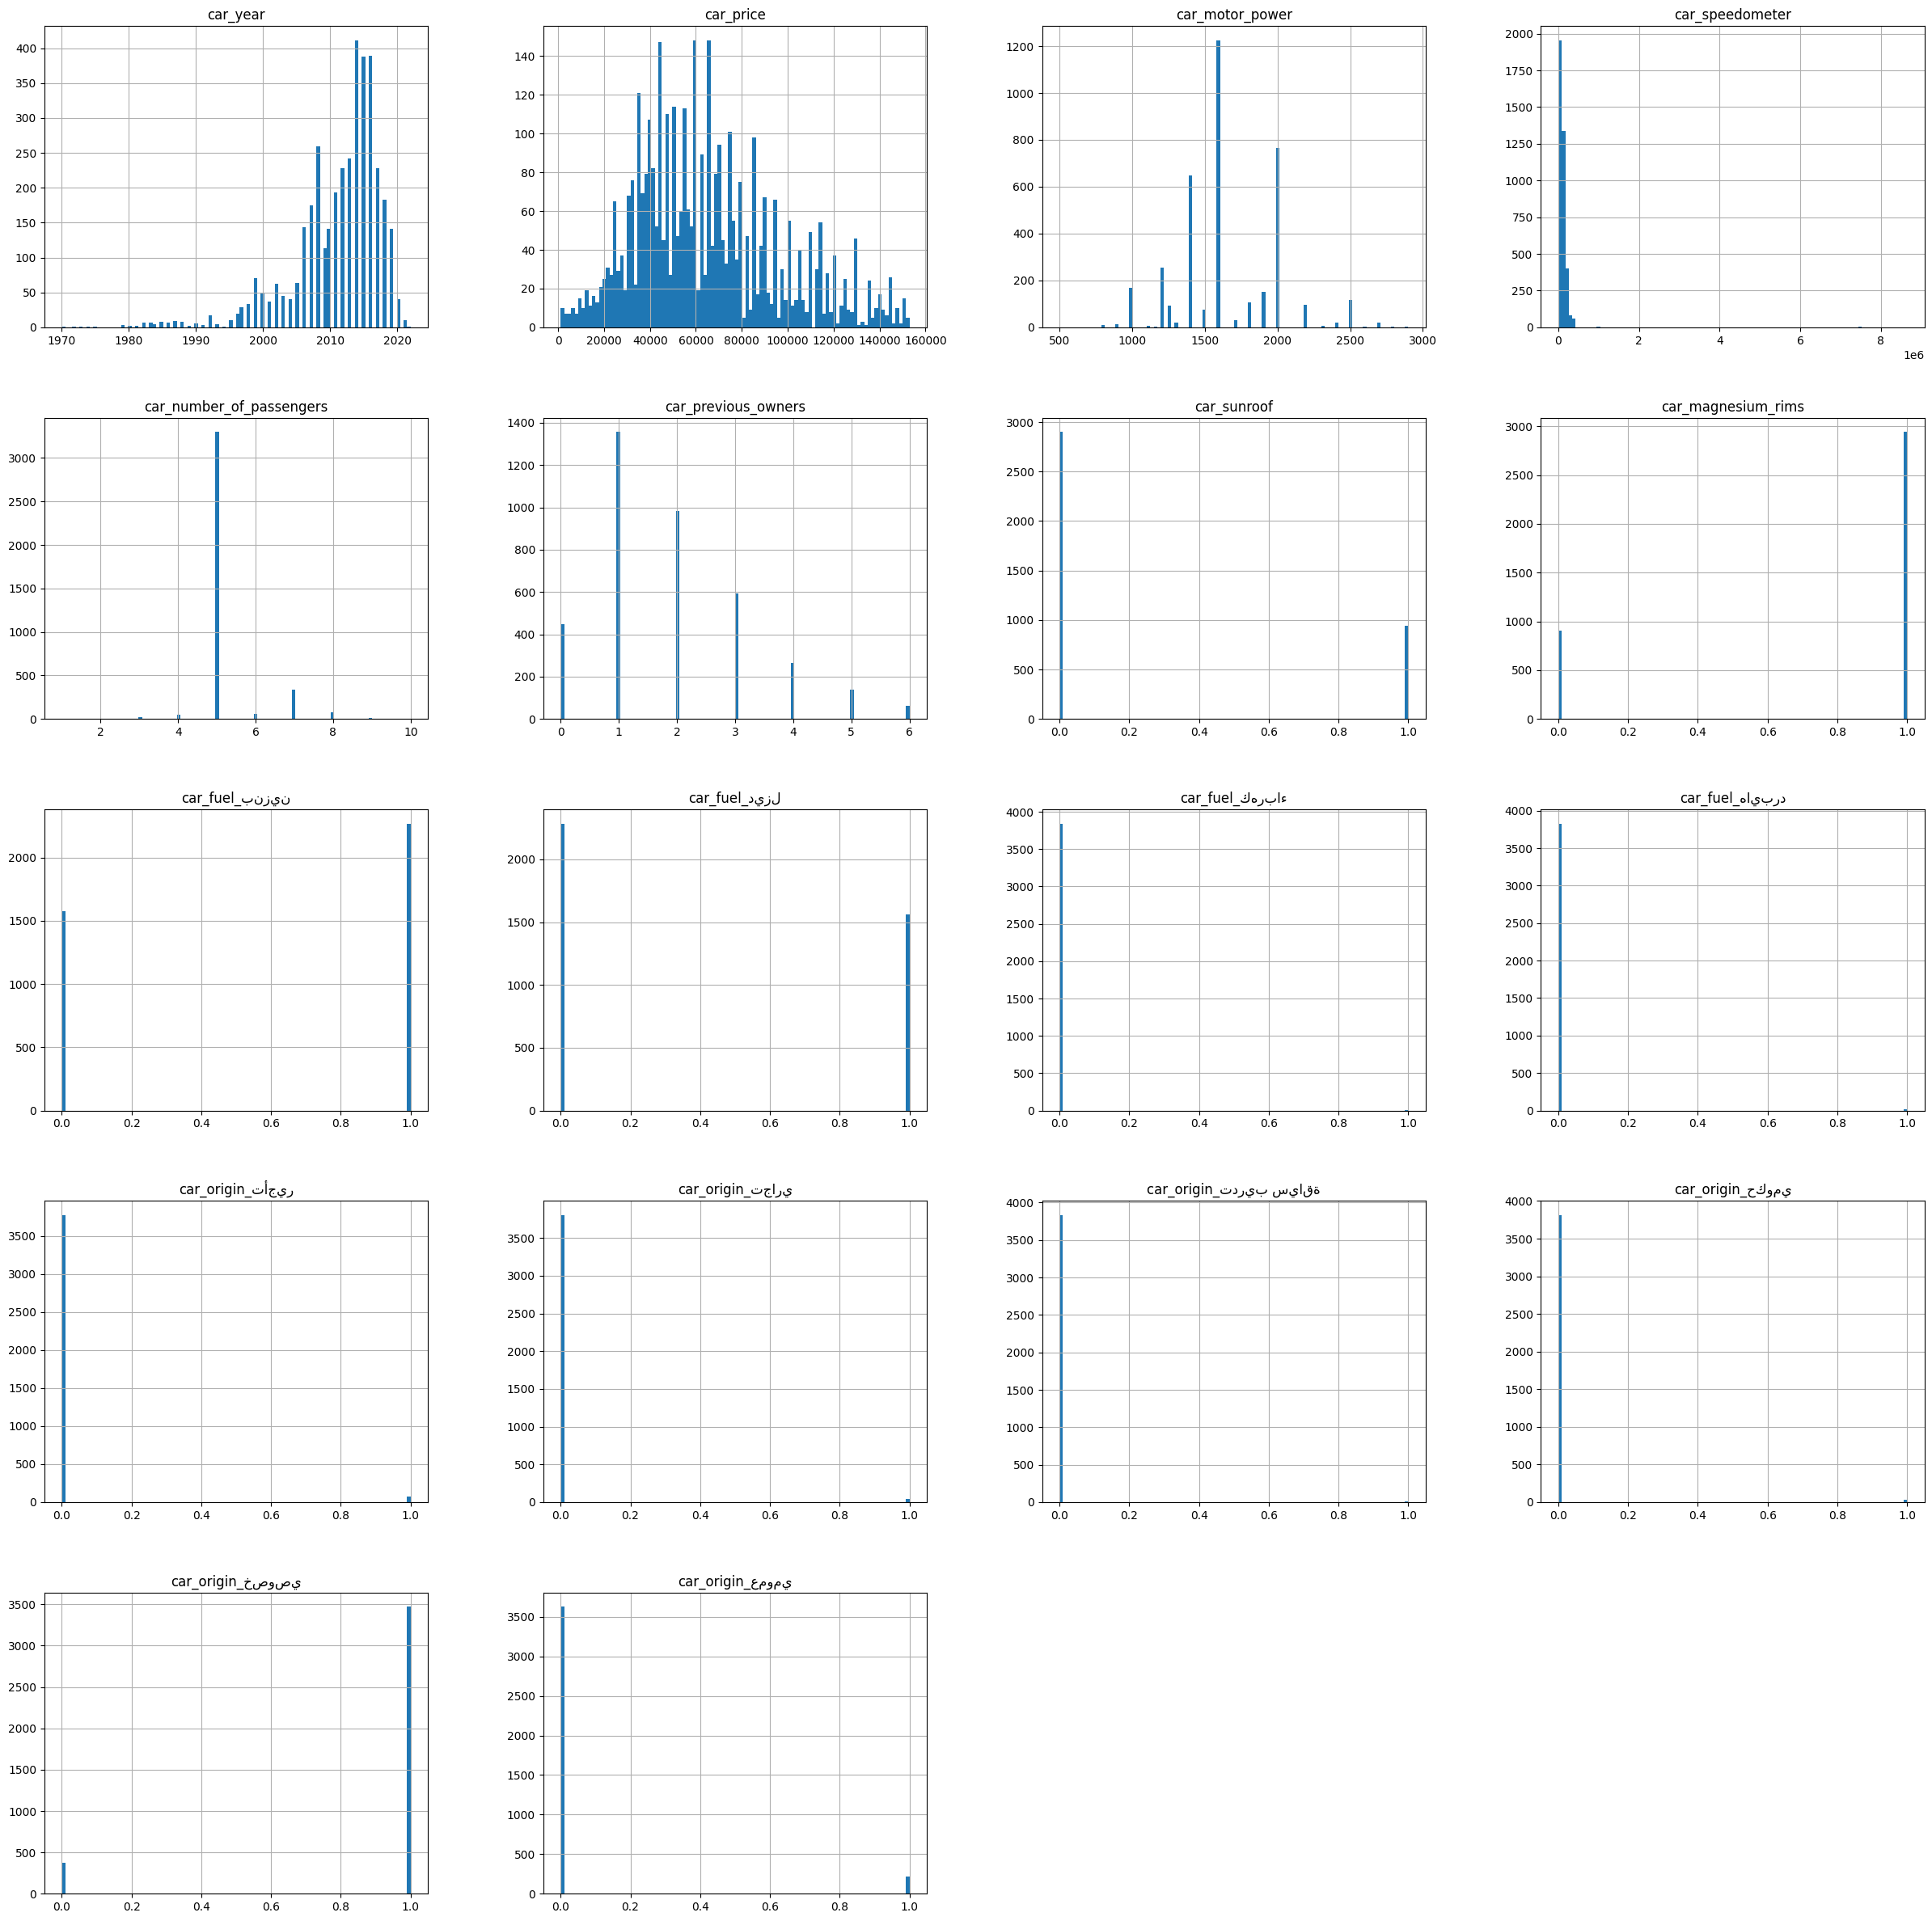

In [54]:
import matplotlib.pyplot as plt 

data.hist(bins=100,figsize=(30,30))
plt.show()

# Car name
Take the unique car name from the data and save it in json file to map it withe cleer name then replace it in the dataset

Then encode the car name column

In [55]:
unique_cars_name = list(data['car_name'].unique())

mapping = {unique_car_name: '' for unique_car_name in unique_cars_name}


'''
i comment this code to not update the mapping
'''
# with open('car_mapping.json', 'w', encoding='utf-8') as file:
#     json.dump(mapping, file, ensure_ascii=False)



'\ni comment this code to not update the mapping\n'

In [56]:
with open('car_mapping.json', 'r', encoding='utf-8') as file:
    updated_car_name = json.load(file)

data['car_name'].replace(updated_car_name, inplace=True)

In [57]:
data = encode_and_one_hot_encode(data, 'car_name')

C:\Users\SS\AppData\Local\Temp\ipykernel_4156\2631233656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe.loc[:, f"{column_name}_{category}"] = encoded[:, i].astype(int)
C:\Users\SS\AppData\Local\Temp\ipykernel_4156\2631233656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe.loc[:, f"{column_name}_{category}"] = encoded[:, i].astype(int)
C:\Users\SS\AppData\Local\Temp\ipykernel_4156\2631233656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

 `Normalize` some columns to have values between 0 and 1 using MinMaxScaler to make it easier to train the model and avoid overfitting

In [58]:
def normalize_columns(dataframe, column_names):
    scaler = MinMaxScaler()

    columns_to_normalize = dataframe[column_names]

    normalized_values = scaler.fit_transform(columns_to_normalize)

    dataframe[column_names] = normalized_values

    return dataframe

In [59]:
# columns_to_normalize = ['car_speedometer', 'car_motor_power','car_year']
# data = normalize_columns(data, columns_to_normalize)


# Saving cleaned data

In [60]:
data.to_csv('../csv/cleaned_data_car.csv', index=False)